# **CS 1810 Homework 1**
---
To account for potential version issues, try the following in your terminal:

1. Create a new environment with `python3 -m venv venv`
2. Activate that environment with `source venv/bin/activate`
3. Make sure the interpreter in the top right corner of your VSCode (or whatever you use to run your code is venv).
4. If you get a "install kernel" message, press it.
5. Run `pip install -r requirements.txt`
6. Run the remainder of this notebook.

Note that this is not necessary but can help prevent any issues due to package versions.

**The following notebook is meant to help you work through Problems 1, 3, and 4 on Homework 1. You are by no means required to use it, nor are you required to fill out/use any of the boilerplate code/functions. You are welcome to implement the functions however you wish.**

In [45]:
# Loading data
import numpy as np
import matplotlib.pyplot as plt

train_data = np.genfromtxt("data/earth_temperature_sampled_train.csv", delimiter = ',')
year_train = train_data[:, 0] / 1000
temp_train = train_data[:, 1]
test_data = np.genfromtxt("data/earth_temperature_sampled_test.csv", delimiter = ',')
year_test = test_data[:, 0] / 1000
temp_test = test_data[:, 1]


# Problem 1

## Problem 1 Subpart 1(a)

In [46]:
def predict_knn(x_new, k, x_train, y_train):
    """
    Returns predictions for the values in x_test, using KNN predictor with the specified k.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param k: number of nearest neighbors to consider
    :param x_train: x coordinates of training dataset
    :param y_train: y coordinates of training dataset

    :return: if x_new = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is the kNN with specified parameters and training set
    """

    # Compute distances, shape is (n, m) where n is the number of test points and m is the number of training points
    dists = np.abs(x_train.reshape(1,-1) - x_new.reshape(-1,1))
    # Argsort the rows
    ix = dists.argsort(axis = 1)
    ix = ix[:, :k] # take only the k smallest distances
    y = y_train[ix]

    # sum each row
    return np.mean(y, axis = 1)

57


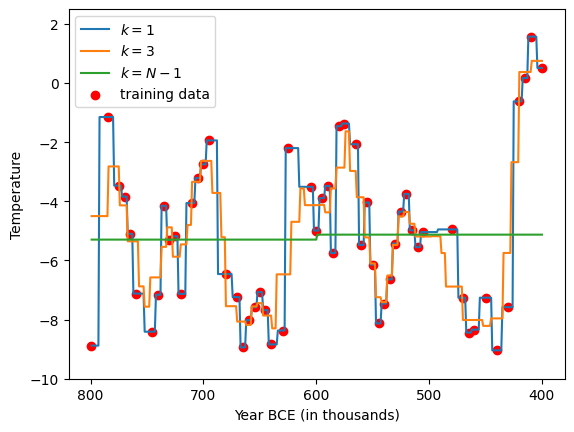

In [20]:
# plot functions
N = year_train.shape[0]
x_array = np.arange(400, 800, 1)
plt.plot(x_array, predict_knn(x_array, 1, year_train, temp_train), label = "$k = 1$")
plt.plot(x_array, predict_knn(x_array, 3, year_train, temp_train), label = "$k = 3$")
plt.plot(x_array, predict_knn(x_array, N - 1, year_train, temp_train), label = "$k = N - 1$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.legend()
plt.xticks(np.arange(400, 900, 100))
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p2.1.png
plt.savefig("img_output/p1.1a.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 1(b)

In [16]:
def model_mse(predictions, true):
    """
    Calculate the MSE for the given model predictions, with respect to the true values

    :param predictions: predictions given by the model
    :param true: corresponding true values
    :return: the mean squared error
    """
    # YOUR CODE HERE
    return np.mean((predictions - true) ** 2)

Minimum MSE:  1.7406000000000004


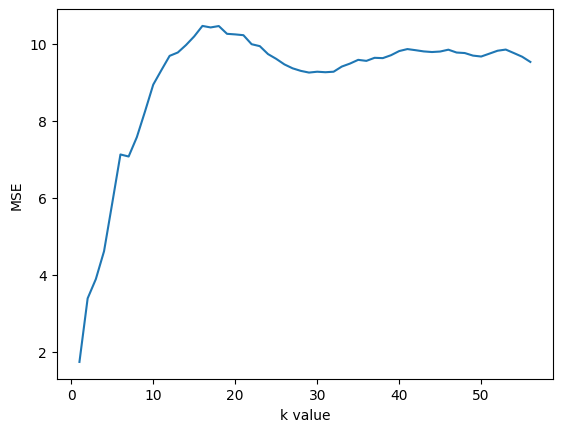

In [33]:
# Compute the MSEs for different values of k

MSEs = []

for k in range(1, N):
    predictions = predict_knn(year_test, k, year_train, temp_train)
    MSEs.append(model_mse(predictions, temp_test))

plt.plot(range(1, N), MSEs)
plt.xlabel("k value")
plt.ylabel("MSE")

pass

## Problem 1 Subpart 2(a)

In [109]:

def kernel_regressor(x_new, tau, x_train, y_train):
    """
    Run f_tau(x) with parameter tau on every entry of x_new.

    :param x_new: a numpy array of x_values on which to do prediction. Shape is (n,)
    :param float tau: lengthscale parameter
    :param y_train: the x coordinates of the training set
    :param y_train: the y coordinates of the training set
    :return: if x_new = [x_1, x_2, ...], then return [f(x_1), f(x_2), ...]
             where f is calculated wrt to the training data and tau
    """
    # YOUR CODE HERE

    def kernel(x, x_train, tau):
        return np.exp(- ((x - x_train) ** 2) / (tau ))

    numerator = kernel(x_new.reshape(-1, 1), x_train, tau) @ y_train
    denominator = kernel(x_new.reshape(-1, 1), x_train, tau) @ np.ones(y_train.shape)

    return numerator / denominator

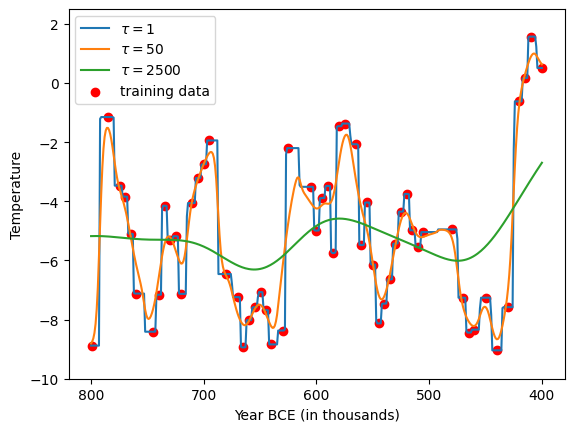

In [110]:
# Plot functions
x_array = np.arange(400, 800 + 1, 1)
for tau in [1, 50, 2500]:
    plt.plot(x_array, kernel_regressor(x_array, tau, year_train, temp_train), label = f"$\\tau = {tau}$")
plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")
plt.ylim([-10,2.5])

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p1.2.png
plt.savefig("img_output/p1.2a.png", bbox_inches = "tight")
plt.show()

## Problem 1 Subpart 2(c)

In [111]:
# Compute the MSEs for different values of tau
# YOUR CODE HERE

MSEs = {}

for tau in [1, 50, 2500]:
    predictions = kernel_regressor(year_test, tau, year_train, temp_train)
    MSEs[tau] = model_mse(predictions, temp_test)

print(MSEs)

{1: np.float64(1.9472621565209178), 50: np.float64(1.8582899169613447), 2500: np.float64(8.333886806980791)}


# Problem 3

## Problem 3 Subpart 1

In [61]:
def exp_kernel(x,mu):
    return np.exp(-1/float(5)*np.power(x-mu,2))

def f_scale(X, part = "a"):
  if part == "a":
    X = X/181 # 181000
  elif part == "b":
    X = X/4e2 # 4e5
  elif part == "c":
    X = X/1.81 # 1810    
  elif part == "d":
    X = X/.181 # 181
  return X

# TODO: Complete this `make_basis` function according to the above
# specifications. The function should return the array `phi(X)`

def make_basis(X,part='a'):
  """
  Args:
    X: input of years (or any variable you want to turn into the appropriate basis) as
      ndarray with length `N`.
    part: one of `a`, `b`, `c`, `d` depending on the basis function.

  Returns:
    ndarray `phi(X)` of shape `(N,D)`. For each part the shapes of your
    training data `make_basis(years_train)` should be
      (a) 57x10, (b) 57x10, (c) 57x10, (d) 57x50.
  """
  
  ### DO NOT CHANGE THIS SECTION 
  ### it is to prevent numerical instability from taking the exponents of
  ### the years, as well as break symmetry when dealing with a Fourier basis.
  X = f_scale(X, part)
  ### end section

  # YOUR CODE HERE
  N = X.shape[0]
  phi = np.ones((N, 1))

  if part == 'a':
    for j in range(1, 10):
      phi = np.column_stack((phi, X**j))
  elif part == 'b':
    for j in range(1, 10):
      phi = np.column_stack((phi, exp_kernel(X, (j + 7 )/ 8)))
  elif part == 'c':
    for j in range(1, 10):
      phi = np.column_stack((phi, np.cos(X / j)))
  elif part == 'd':
    for j in range(1, 50):
      phi = np.column_stack((phi, np.cos(X / j)))

  return phi

We are now solving the multi-dimensional OLS regression problem. For each $i=1,\ldots, N$, we have 
$$ \hat y_i = \mathbf{w}^\top\mathbf{\phi}(x_i) = \sum_{j=1}^D w_j \phi_j(x_i).  $$

We can find the weights that minimize the MSE $\frac 1N\| \mathbf{y} - \mathbf{\phi}(\mathbf{X})\mathbf{w}\| $ with the analytic solution described in the textbook at Derivation 2.6.1.
$$ \mathbf{w^*} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}. $$

In [62]:
# Helper function to find the regression weights using the Moore-Penrose pseudoinverse.
def find_weights(X,y):
    w_star = np.dot(np.linalg.pinv(np.dot(X.T, X)), np.dot(X.T, y))
    return w_star

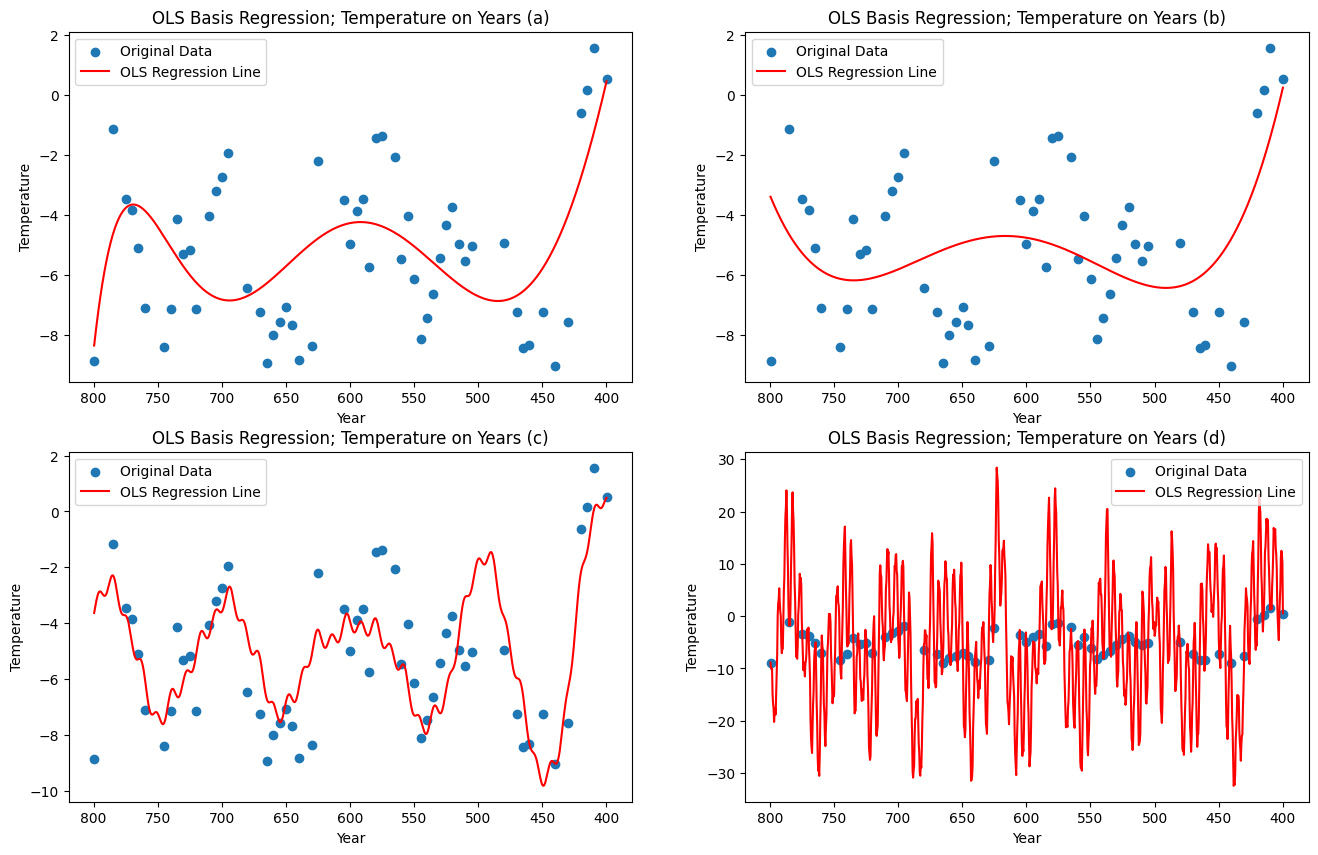

In [63]:
_, ax = plt.subplots(2,2, figsize = (16,10))

for i, part in enumerate(['a', 'b', 'c' ,'d']):
  # Plotting the original data
  phi_years_train = make_basis(year_train, part)
  w = find_weights(phi_years_train, temp_train)

  
  ax[i//2, i%2].scatter(year_train, temp_train, label = "Original Data")
  
  xs = np.linspace(year_train.min(), year_train.max(), 1000)
  ax[i//2, i%2].set_xlabel("Year")
  ax[i//2, i%2].set_ylabel("Temperature")
  ax[i//2, i%2].set_title(f"OLS Basis Regression; Temperature on Years ({part})")

  # ax[i//2, i%2].legend()

  # TODO: Plot the regression line generated by your model. 
  # YOUR CODE HERE

  phi_xs = make_basis(xs, part)
  phi_pred = phi_xs @ w

  ax[i//2, i%2].plot(xs, phi_pred, label = "OLS Regression Line", color="red")

  ax[i//2, i%2].legend()

  pass
  ax[i//2, i%2].invert_xaxis()
  
plt.savefig("img_output/p3.1.png")

## Problem 3 Subpart 2

In [74]:
# Compute the MSE for each basis
# YOUR CODE HERE

MSEs = {}

for _, part in enumerate(['a', 'b', 'c' ,'d']):
    # Training data - makes basis
    phi_years_train = make_basis(year_train, part)

    # Finds weights for the training data
    w = find_weights(phi_years_train, temp_train)

    # Testing data - makes basis
    phi_years_test = make_basis(year_test, part)

    # Prediction of testing data
    phi_pred = phi_years_test @ w

    # MSE please work
    MSEs[part] = model_mse(phi_pred, temp_test)

print(MSEs)

{'a': np.float64(7.955747614632525), 'b': np.float64(8.708160867357162), 'c': np.float64(5.96702453401681), 'd': np.float64(58.885544156564514)}


# Problem 4

## Problem 4 Subpart 5

In [93]:
def find_lasso_weights(lam, X, y):
    """
    Fit the weights of a LASSO linear regression through the coordinate descent algorithm.

    :param lam: the lambda parameter
    :param X: the design matrix with training set features
    :param y: the training set labels
    :return: the fitted weights
    """
    # YOUR CODE HERE

    D = X.shape[1] # size of the num of rows in X
    w = np.ones(D) # w_0

    for _ in range(5000):

        for d in range(1, D + 1):

            x_d = X[:, d - 1] # d'th but adjust for index column of X
            rho = x_d.T @ (y - ((X @ w) - w[d - 1] * x_d))

            if d == 1:
                w[d - 1] = rho / np.sum(x_d ** 2)
            else:
                w[d - 1] = np.sign(rho) * max(abs(rho) - (lam / 2), 0) / np.sum(x_d ** 2)

    return w

In [94]:
# Helper function for standardizing inputs to LASSO
def preprocess_lasso(X):
    X = make_basis(X, part='d')
    X[:, 1:] = (X[:, 1:] - X[:, 1:].mean(axis = 0)) / X[:, 1:].std(axis = 0)
    return X

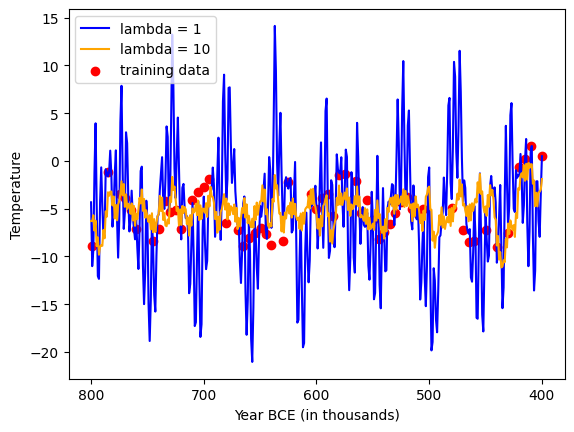

In [108]:
# Fit the weights for both models
phi_x_train = preprocess_lasso(year_train)
lam1, lam2 = 1, 10
w1 = find_lasso_weights(lam1, phi_x_train, temp_train)
w2 = find_lasso_weights(lam2, phi_x_train, temp_train)

# Plot functions
x_array = np.arange(400, 800 + 1, 1)
phi_x_array = preprocess_lasso(x_array)

# TODO: Plot the regression line generated by your model. 
# YOUR CODE HERE

phi_pred1 = phi_x_array @ w1
phi_pred2 = phi_x_array @ w2

plt.plot(x_array, phi_pred1, label = "lambda = 1", color="blue")
plt.plot(x_array, phi_pred2, label = "lambda = 10", color="orange")

pass

plt.scatter(year_train, temp_train, label = "training data", color = "red")
plt.legend()
plt.xticks(np.arange(400, 800 + 100, 100))
plt.ylabel("Temperature")
plt.xlabel("Year BCE (in thousands)")

plt.gca().invert_xaxis()
# figure should be in your directory now, with name p4.5.png
plt.savefig("img_output/p4.5.png", bbox_inches = "tight")
plt.show()

In [97]:
# Compute the MSE for both values of lambda
# YOUR CODE HERE

MSEs = {}

for lam in [1, 10]:
    phi_x_test = preprocess_lasso(year_test)
    w = find_lasso_weights(lam, phi_x_train, temp_train)
    phi_pred = phi_x_test @ w
    MSEs[lam] = model_mse(phi_pred, temp_test)

print(MSEs)

pass

{1: np.float64(30.060597123357237), 10: np.float64(15.618355559963952)}
